In [ ]:
# trabalho MNIST
# Afonso Brandão 20230403

In [1]:
# Bibliotecas (no COLAB o tensorflow já está instalado)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

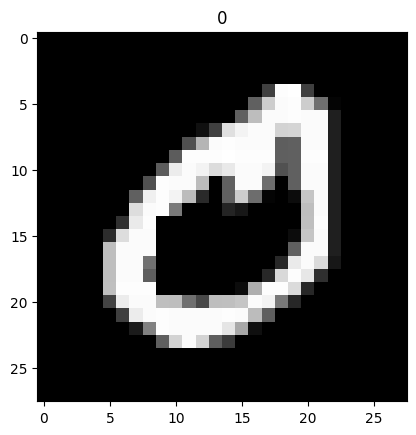

In [4]:
# Dados e divisão de testes
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

# Teste de imagem baixada
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [5]:
# Redimensionamento para 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
# Transformação e normalização dos dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255
X_teste /= 255

# Dummy de 10 classes
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [10]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [11]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 1.0293 - accuracy: 0.6378 - val_loss: 0.5331 - val_accuracy: 0.8422
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5449 - accuracy: 0.8373 - val_loss: 0.3562 - val_accuracy: 0.8968
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4316 - accuracy: 0.8752 - val_loss: 0.3047 - val_accuracy: 0.9110
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3672 - accuracy: 0.8934 - val_loss: 0.2448 - val_accuracy: 0.9276
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3322 - accuracy: 0.9043 - val_loss: 0.2219 - val_accuracy: 0.9333
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3038 - accuracy: 0.9114 - val_loss: 0.2065 - val_accuracy: 0.9369
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2822 - accuracy: 0.9185 - val_loss: 0.1949 - val_accurac

313/313 [==============================] - 1s 2ms/step


array([[9.32211253e-11, 6.91008563e-06, 2.67957017e-04, ...,
        9.99656439e-01, 2.13234046e-07, 1.00167608e-05],
       [3.20645199e-08, 5.58556167e-05, 9.98079538e-01, ...,
        1.34815593e-06, 4.84463053e-05, 6.76697726e-11],
       [3.21078060e-11, 9.99146402e-01, 1.13676295e-04, ...,
        2.52507773e-04, 3.58103833e-04, 3.10652081e-06],
       ...,
       [9.11938969e-06, 2.16330527e-08, 1.91688850e-05, ...,
        6.78494780e-06, 4.77411922e-05, 8.24070256e-03],
       [2.11955120e-09, 2.17537803e-07, 1.41563247e-10, ...,
        8.30261554e-12, 2.49193778e-04, 7.34054629e-06],
       [2.74890795e-08, 1.05314764e-10, 2.18082891e-06, ...,
        2.27077146e-12, 1.21121220e-08, 5.87642573e-11]], dtype=float32)

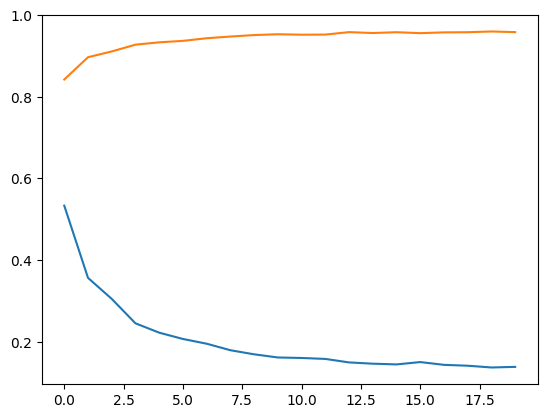

In [12]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

In [13]:
# Matriz confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 23ms/step


[4]